# Making Business Decisions Based on Data Project

## Project Description:

In this project we are going to to help a big online store to:

1. Prioritize hypotheses based on their ICE and RICE score;
2. Analyze results of an A/B testing.



## Analysis Plan:

The project will be completed through the following steps: 

1. [Part 1. Prioritizing Hypotheses](#Part-1.-Prioritizing-Hypotheses), which will include:
    - calculating ICE score for each hypothesis,
    - calculating RICE score for each hypothesis,
    - looking at how priority positions of each hypothesis changed after adding ICE and RICE scores.
2. [Part 2. A/B Test Analysis](#Part-2.-A/B-Test-Analysis), including: 
    - [Data pre-processing](#Data-pre-processing),
    - [Graphing cumulative revenue by group.](#Graphing-cumulative-revenue-by-group.)
    - [Graphing cumulative average order size by group.](#Graphing-cumulative-average-order-size-by-group.)
    - [Graphing the relative difference in cumulative average order size for group B compared with group A.](#Graphing-the-relative-difference-in-cumulative-average-order-size-for-group-B-compared-with-group-A.)
    - [Calculating each group's conversion rate as the ratio of orders to the number of visits for each day.](#Calculating-each-group's-conversion-rate-as-the-ratio-of-orders-to-the-number-of-visits-for-each-day.)
    - [Plotting a scatter chart of the number of orders per user.](#Plotting-a-scatter-chart-of-the-number-of-orders-per-user.)
    - [Calculating the 95th and 99th percentiles for the number of orders per user. Defining the point at which a data point becomes an anomaly.](#Calculating-the-95th-and-99th-percentiles-for-the-number-of-orders-per-user.-Defining-the-point-at-which-a-data-point-becomes-an-anomaly.)
    - [Plotting a scatter chart of order prices.](#Plotting-a-scatter-chart-of-order-prices.)
    - [Calculating the 95th and 99th percentiles of order prices. Defining the point at which a data point becomes an anomaly.](#Calculating-the-95th-and-99th-percentiles-of-order-prices.-Defining-the-point-at-which-a-data-point-becomes-an-anomaly.)
    - [Finding the statistical significance of the difference in conversion between the groups using the raw data.](#Finding-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-raw-data.)
    - [Finding the statistical significance of the difference in average order size between the groups using the raw data.](#Finding-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-raw-data.)
    - [Finding the statistical significance of the difference in conversion between the groups using the filtered data.](#Finding-the-statistical-significance-of-the-difference-in-conversion-between-the-groups-using-the-filtered-data.)
    - [Finding the statistical significance of the difference in average order size between the groups using the filtered data.](#Finding-the-statistical-significance-of-the-difference-in-average-order-size-between-the-groups-using-the-filtered-data.)
    - [Making a decision based on the test results.](#Making-a-decision-based-on-the-test-results.)

## Part 1. Prioritizing Hypotheses

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
import scipy.stats as stats

In [2]:
hypotheses= pd.read_csv('/datasets/hypotheses_us.csv', sep=';')

In [3]:
pd.set_option('max_colwidth', 10000)

In [4]:
hypotheses=hypotheses.reset_index()

In [5]:
#calculating the ICE score for each hypothesis
hypotheses['ice']= ((hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']).round()

In [6]:
hypotheses.sort_values(by='ice', ascending=False)

,index,Hypothesis,Reach,Impact,Confidence,Effort,ice
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0


In [7]:
# Calculating the RICE score for each hypothesis
hypotheses['rice']= ((hypotheses['Reach']*hypotheses['Impact']*hypotheses['Confidence'])/hypotheses['Effort']).round()

In [8]:
hypotheses.sort_values(by='rice', ascending=False)

,index,Hypothesis,Reach,Impact,Confidence,Effort,ice,rice
7,7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.0,112.0
2,2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.0,56.0
0,0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.0,40.0
6,6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.0,40.0
8,8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.0,16.0
3,3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.0,9.0
1,1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.0,4.0
5,5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.0,4.0
4,4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.0,3.0


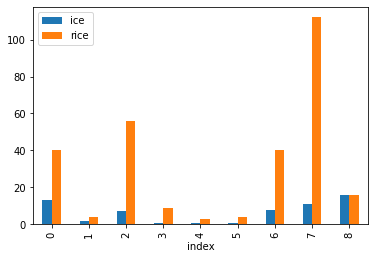

In [9]:

hypotheses.plot(x="index", y=["ice", "rice"], kind="bar")
plt.show()

Lookig at the hypotheses arranged according to their ICE and RICE score, we can see that the positions of each hypothesis changed except for hypothesis 6, which remained fourth both score lists. 

The bottom half of the lists according to both scores were given to hypothesis 1,3,4,5. 
According to ICE score, the leading position was taken over by hypothesis 8, which had very high confidence and impact rate.  Its reach rate, however, was not as high and therefore, it landed in the middle of the chart for the RICE scores.

Hypothesis n.7, after being in the top 3 hypothesis according to ICE, landed on top of the RICE chart due to the highest Reach value in the list.

Based on the relative positions according to both ICE and RICE scores, hypotheses 7,0,2 and 6 would be the strongest candidates for testing.

## Part 2. A/B Test Analysis

### Data pre-processing

In [10]:
orders=pd.read_csv('/datasets/orders_us.csv')

In [11]:
visits=pd.read_csv('/datasets/visits_us.csv')

In [12]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1197 non-null int64
visitorId        1197 non-null int64
date             1197 non-null object
revenue          1197 non-null float64
group            1197 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 46.9+ KB


In [13]:
orders.describe()

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


In [14]:
orders.head(5)

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
2,2961555356,4069496402,2019-08-15,10.2,A
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B


In order to prepare the results for analysis, we should make sure that: 
a) transactions were not duplicated

In [15]:
ordersDuplicated = orders[orders.duplicated(['transactionId'])]
ordersDuplicated

,transactionId,visitorId,date,revenue,group


b) each visitor was assigned to a single group

In [16]:

visitor2groups=orders.groupby('visitorId').agg({'group': 'nunique'}).sort_values(by='group', ascending=False).reset_index()


In [17]:

usersWithManyGroups =visitor2groups[visitor2groups['group'] > 1]['visitorId']
len(usersWithManyGroups)

58

In [18]:

orders=orders[np.logical_not(orders['visitorId'].isin(usersWithManyGroups))]

In [19]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1016 entries, 0 to 1196
Data columns (total 5 columns):
transactionId    1016 non-null int64
visitorId        1016 non-null int64
date             1016 non-null object
revenue          1016 non-null float64
group            1016 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 47.6+ KB


The `orders` dataframe is now ready for analysis

In [20]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
date      62 non-null object
group     62 non-null object
visits    62 non-null int64
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [21]:
visits.describe()

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


In [22]:
visits.tail()

,date,group,visits
57,2019-08-27,B,720
58,2019-08-28,B,654
59,2019-08-29,B,531
60,2019-08-30,B,490
61,2019-08-31,B,718


The `orders` and `visits` dataframes were successfully pre-processed and are ready for further analysis.

### Graphing cumulative revenue by group.

In [23]:

orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [24]:
datesGroups = orders[['date','group']].drop_duplicates()

In [25]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'transactionId' : pd.Series.nunique, 'visitorId' : pd.Series.nunique, 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group']) 

In [26]:
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])].agg({'date' : 'max', 'group' : 'max', 'visits' : 'sum'}), axis=1).sort_values(by=['date','group'])

In [27]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visits']

In [28]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]

In [29]:
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

In [30]:
register_matplotlib_converters()

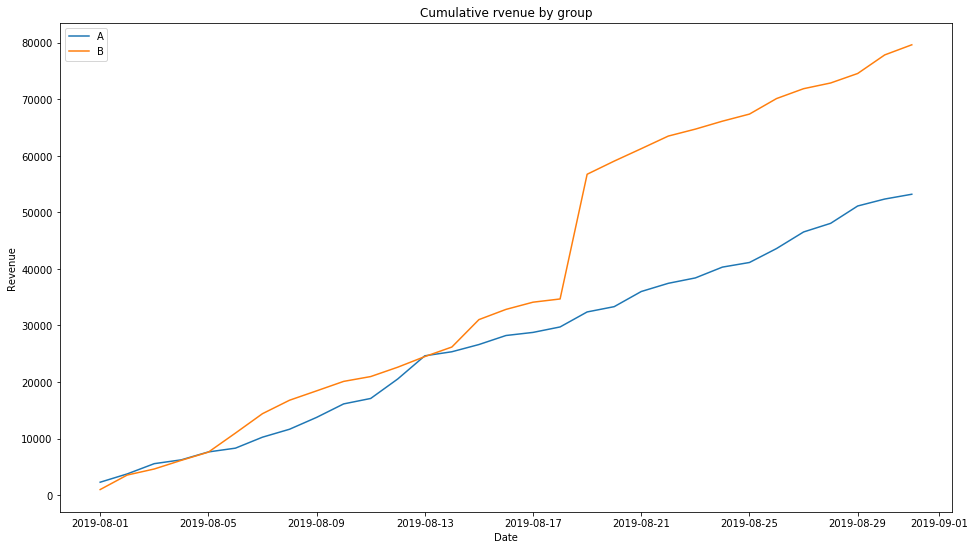

In [31]:
plt.figure(figsize=(16, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.legend()
plt.title('Cumulative rvenue by group')
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.show()


After graphing the cumulative revenue by group, we can see that in the beginning the revenue for both groups was very similar up to 18th day of the test when the revenue of group B showed a steep increase (of around 30000), whereas revenue of group A did not. This might have been caused by an anomalous order which affected the cumulative revenue.

Since that day, the difference between the revenues of both groups remained at the level of around 30000 although each one of them continued to grow steadily. 

### Graphing cumulative average order size by group.

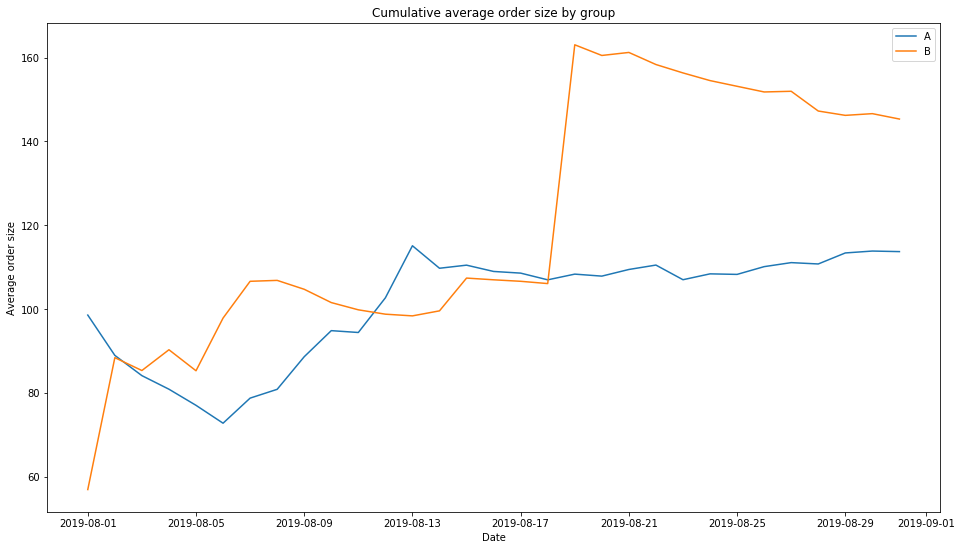

In [32]:
plt.figure(figsize=(16, 9))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.legend() 
plt.title('Cumulative average order size by group')
plt.xlabel('Date')
plt.ylabel('Average order size')
plt.show()

The Graph representing average group order sizes shows that clearly group B has higher value average orders than group A. Similarly to the graph representing the cumulative revenue, we can see on the graph that although in the initial 17 days of the test both groups had very similar average order values, however, after a rapid spike in the order size on the 18th day of the test, order values for group B remained higher than those for group A. 

It is worth noticing that: 
- since day 18, average order values of group B have been decreasing,
- the rapid growth in the average order and revenue values for group B might be caused by an anomalous order. 


### Graphing the relative difference in cumulative average order size for group B compared with group A. 

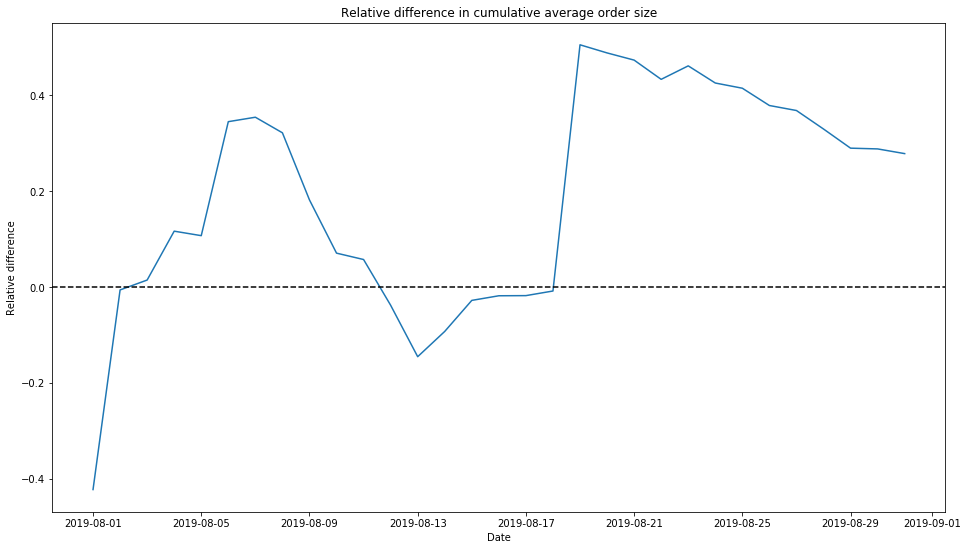

In [33]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

plt.figure(figsize=(16, 9))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--') 
plt.title('Relative difference in cumulative average order size')
plt.xlabel('Date')
plt.ylabel('Relative difference')
plt.show()

the line graph representing the difference in average order size illustrates how the difference was flactuating for the first 17 days of the test and how it rapidly increase during one day (18). The relative difference has been steadily decreasing since day 19. 

It would be recommended to continue the test in order to see whether the value of the relative difference will continue decreasing or whether it will remain stable. 

### Calculating each group's conversion rate as the ratio of orders to the number of visits for each day. 

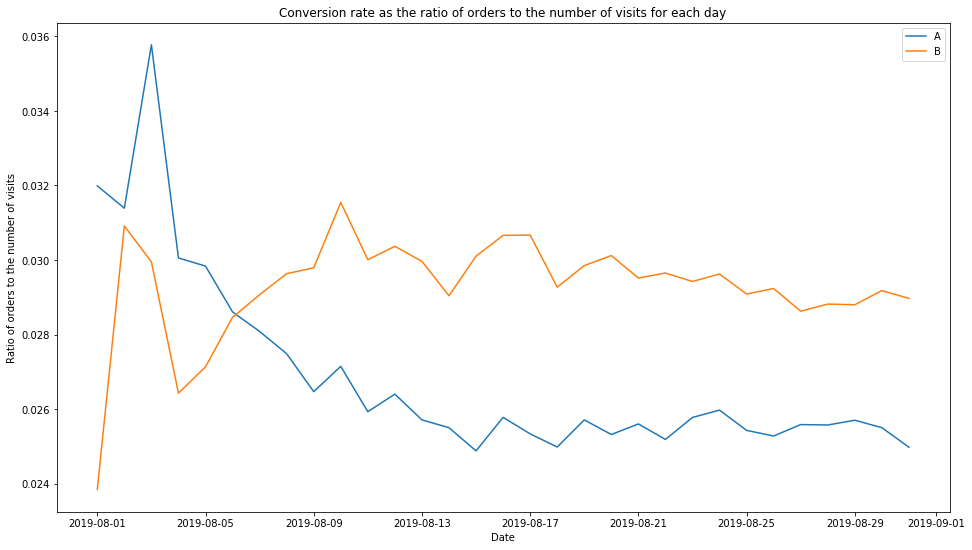

In [34]:

cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']

cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(16, 9))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.legend()
plt.title('Conversion rate as the ratio of orders to the number of visits for each day')
plt.xlabel('Date')
plt.ylabel('Ratio of orders to the number of visits')
plt.show()


The graph comparing conversion rate as the ratio of orders to the number of visits for each day for both groups that after initial steep fluctuation, after around a week of testing, the ratio of group A has significantly decreased wheras that of group B increased. 

Since then they both seem to slightly fluctuate around the ratio of:
A - 0.025- 0.026,
B - 0.029- 0.031.

Hence, after a week of testing the ratios of both group remained stable and it can be seen that the conversion ratio of group B was higher than that of Group A. 

### Plotting a scatter chart of the number of orders per user.

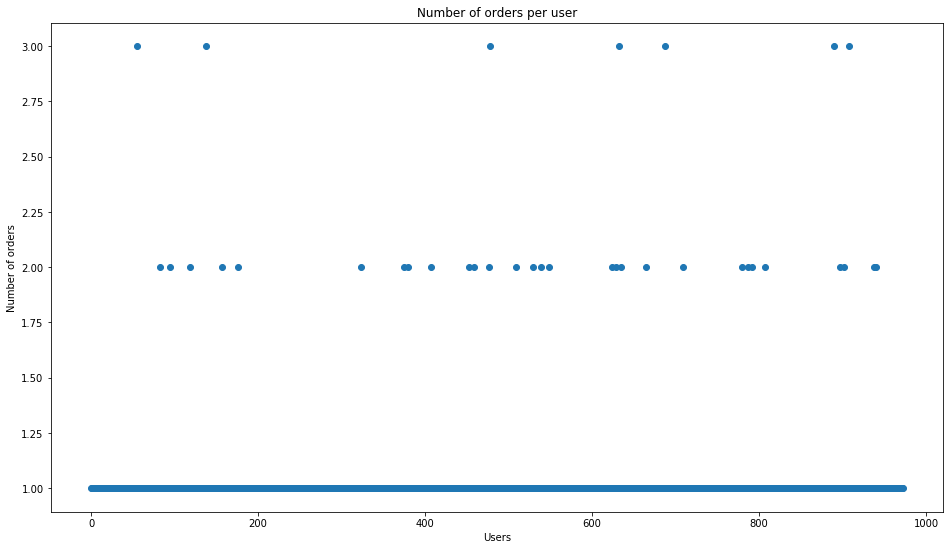

In [35]:
ordersByUsers = orders.drop(['group', 'revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsers.columns = ['visitorId','orders']

x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(16, 9))
plt.scatter(x_values, ordersByUsers['orders'])
plt.title('Number of orders per user')
plt.xlabel('Users')
plt.ylabel('Number of orders')
plt.show()

The scatter plot clearly shows that an overwhelming majority of users had placed only 1 order and very few users had placed 2 or more orders. In order to see this difference in a clearer proportion, the 95th and 99th percentile for the number of orders per user should be calculated.

### Calculating the 95th and 99th percentiles for the number of orders per user. Defining the point at which a data point becomes an anomaly.

In [36]:
x_values = pd.Series(range(0,len(ordersByUsers)))

np.percentile(ordersByUsers['orders'], [95, 99])

array([1., 2.])

As we can see, up to 95% of users placed only 1 order. It can be hence decided, that the users with above 1 order can be treated as anomalous.

### Plotting a scatter chart of order prices.

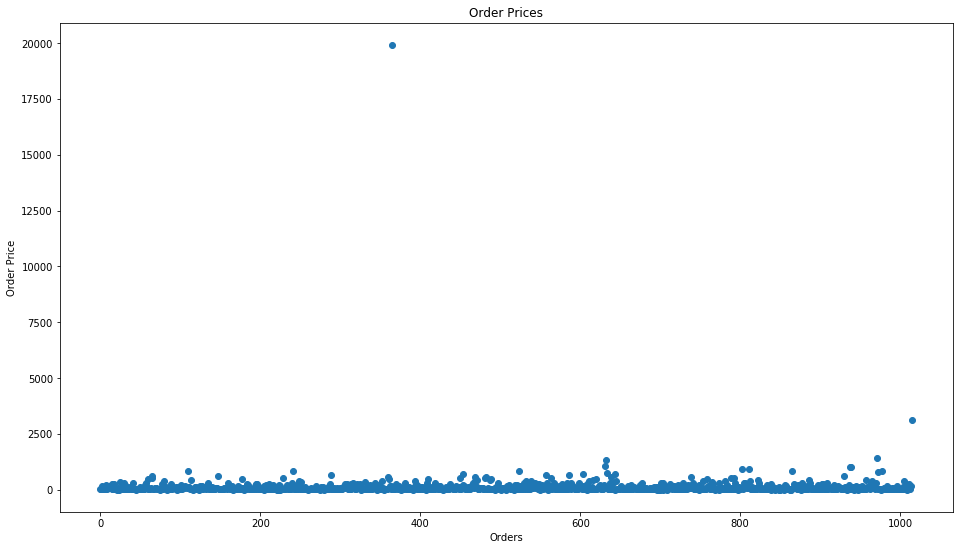

In [37]:
x_values = pd.Series(range(0,len(orders['revenue'])))

plt.figure(figsize=(16, 9))
plt.scatter(x_values, orders['revenue']) 
plt.title('Order Prices')
plt.xlabel('Orders')
plt.ylabel('Order Price')
plt.show()

The scatter plot shows that vast majority of order prices ranged within 500. 
Furthermore, we notice some anomalous orders and the most noticeable of them with the value of 20000, which might have caused rapid increase in revenue and average order size for group B shown in previous graphs. 

In order to see this difference in a clearer proportion, the 95th and 99th percentile for the order prices should be calculated.

### Calculating the 95th and 99th percentiles of order prices. Defining the point at which a data point becomes an anomaly.

In [38]:
np.percentile(orders['revenue'], [95, 99])

array([414.275, 830.3  ])

We can see that 95% of placed orders were within the price of 415. It can be, therefore, decided, that orders above the price of 415 were an anomaly.

### Finding the statistical significance of the difference in conversion between the groups using the raw data.


In [39]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'transactionId']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'transactionId']


In [40]:
sampleA = pd.concat([ordersByUsersA['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])), name='transactionId')],axis=0)

sampleB = pd.concat([ordersByUsersB['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])), name='transactionId')],axis=0)


In this test we will be testing whether: 

Null Hypothesis = There is not a statistically significant difference in conversion between the groups.

Alternative Hypothess = There is a statistically significant difference in conversion between the groups. 

The alpha value chosen for this test is 0.05.

In [41]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

0.006


In [42]:
print("{0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 

0.160


After calculations using raw values, we found out that the p-value is lower than 0.05, hence the null hypothesis was rejected. It shows the groups' conversion rates are statistically different.

Group B has a 16% higher conversion rate than group A.

### Finding the statistical significance of the difference in average order size between the groups using the raw data.


In this test we will be testing whether: 

Null Hypothesis = There is not a statistically significant difference in average order size between the two groups.  
Alternative Hypothess = There is a statistically significant difference in average order size between the two groups. 

The alpha value chosen for this test is 0.05.

In [43]:
print("{0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

0.431


We found out that the p-value is greater than 0.05, hence there is no significant statistical differences between the average transaction sizes of both groups. 

In [44]:
print("{0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

0.278


Although the proven earlier lack of statistically significant difference, the relative difference between the average size of transactions shows that the average size of group B is much greater than that of group A. This, however, might be caused by the anomalous transactions. It will, therefore, be necessary to analyze filtered data for precise results.

### Finding the statistical significance of the difference in conversion between the groups using the filtered data.


The data will be filtered according to the anomalous point decided earlier for a) number of orders above 1, b) order price above 415

In [45]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['transactionId'] > 1]['visitorId'], ordersByUsersB[ordersByUsersB['transactionId'] > 1]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 415]['visitorId']
abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()

In [46]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['transactionId'])),name='transactionId')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['transactionId'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['transactionId'])),name='transactionId')],axis=0) 


In this test we will be testing whether after filtering the data: 


Null Hypothesis = There is not a statistically significant difference in conversion between the groups.  
Alternative Hypothess = There is a statistically significant difference in conversion between the groups. 

The alpha value chosen for this test is 0.05.

In [47]:
print("{0:.3f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))

0.008


The p-value below 0.05 shows that there is a statistically significant difference between the conversion rates of the groups.

In [48]:
print("{0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

0.174


The conversion rate of group B is 17.4% higher than that of the group A. 

### Finding the statistical significance of the difference in average order size between the groups using the filtered data. 

In this test we will be testing whether after filtering the data: 


Null Hypothesis = There is not a statistically significant difference in average order size between the two groups.  
Alternative Hypothess = There is a statistically significant difference in average order size between the two groups. 

The alpha value chosen for this test is 0.05.

In [49]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))



0.386


The p-value is greater than 0.05 proves that the difference between average order sizes is not statistically significant.

In [50]:
print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1))

-0.033


After filtering the data, we can see that the actual difference in order sizes is only of 3.3% in favor of group A. 

We can therefore see that the anomalous orders signified large difference between the two groups in the previous calculations. 

### Making a decision based on the test results. 


After the analysis of cumulative revenue, average order sizes an relative differences between them, as well as finding whether the differences between the groups are statistically significant, we can conclude that:
1. The Conversion rate of group B is greater than that of the group A. 
2. There is no significant difference between average order sizes between the two groups.

We can therefore state, that the A/B testing proved that the hypothesis tested will improve the conversion rate, however, it will not affect the average purchase size. 


The possible decisions are:
1. Stop the test, consider one of the groups the leader. 
2. Stop the test, conclude that there is no difference between the groups. 
3. Continue the test.

From our conclusions, we can say that 
a) there is no reason to continue testing as the results were clear and reflected stable tendencies. 
b) Although there was no significant difference between order size between both groups, It was clearly shown that there is a difference in the conversion rates between the two groups. 

We therefore conclude that: 
- The test can be stopped, 
- Group B appeared as a leader and signficantly increased conversion rates.